# Conteo de las unidades formadoras de colonias (UFC) que presentan colores característicos (azul o rojo)

Dimensiones de la imagen: 657x604 píxeles
Puntos muy pequeños detectados: 28
Bacterias pequeñas detectadas: 15
Bacterias grandes detectadas: 10


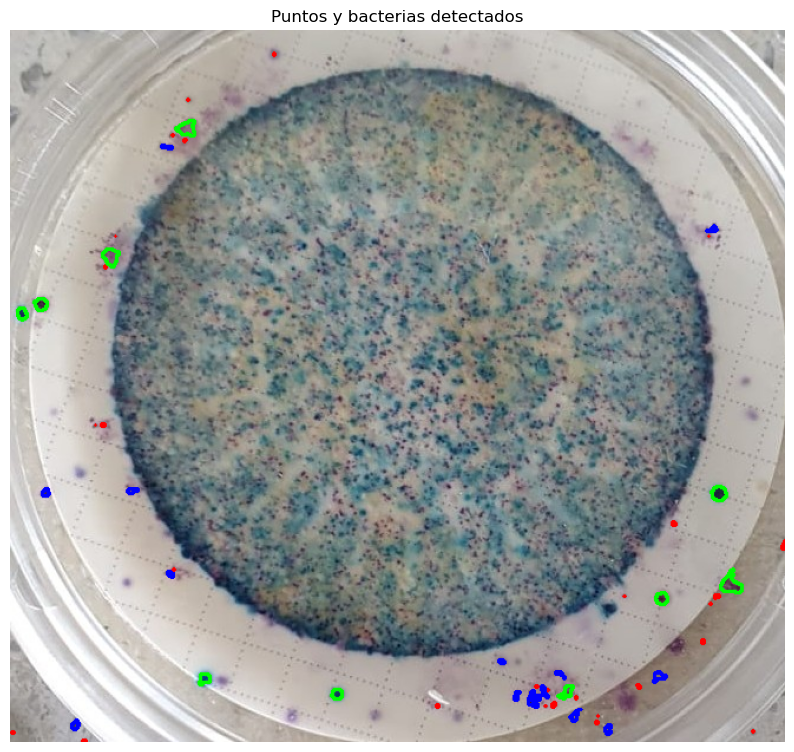

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen original
imagen = cv2.imread('prueba.jpg')

# Obtener las dimensiones de la imagen
altura, ancho, canales = imagen.shape
print(f"Dimensiones de la imagen: {ancho}x{altura} píxeles")

# Convertir la imagen a escala de grises
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Aplicar suavizado para reducir ruido
gris_suavizado = cv2.GaussianBlur(gris, (5, 5), 0)

# Umbralización para separar los puntos del fondo
_, binarizada = cv2.threshold(gris_suavizado, 120, 255, cv2.THRESH_BINARY_INV)

# Detectar contornos
contornos, _ = cv2.findContours(binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializar contadores
puntos_muy_pequeños = 0
bacterias_pequeñas = 0
bacterias_grandes = 0

# Clasificar y dibujar los puntos según su área
for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area < 10:  # Umbral para puntos muy pequeños
        puntos_muy_pequeños += 1
        cv2.drawContours(imagen, [contorno], -1, (0, 0, 255), 2)  # Rojo para muy pequeños
    elif 10 <= area < 50:  # Umbral para bacterias pequeñas
        bacterias_pequeñas += 1
        cv2.drawContours(imagen, [contorno], -1, (255, 0, 0), 2)  # Azul para pequeñas
    elif 50 <= area < 500:  # Umbral para bacterias grandes
        bacterias_grandes += 1
        cv2.drawContours(imagen, [contorno], -1, (0, 255, 0), 2)  # Verde para grandes

# Imprimir resultados en la consola
print(f"Puntos muy pequeños detectados: {puntos_muy_pequeños}")
print(f"Bacterias pequeñas detectadas: {bacterias_pequeñas}")
print(f"Bacterias grandes detectadas: {bacterias_grandes}")

# Mostrar la imagen procesada con detecciones
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Puntos y bacterias detectados")
plt.axis('off')
plt.show()



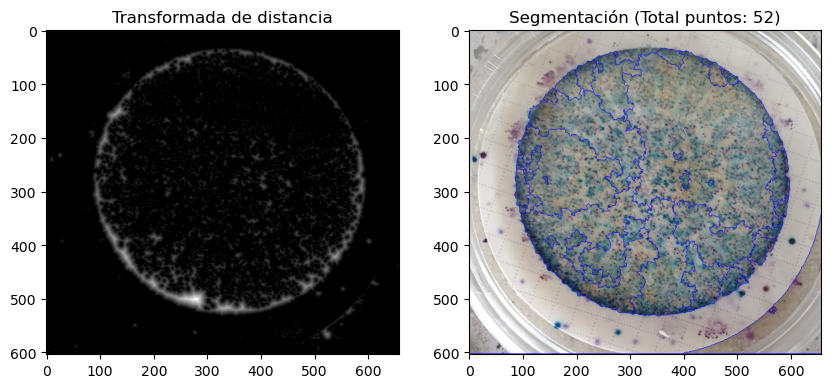

Total de puntos detectados (incluyendo apilados): 52


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = "prueba.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar un umbral para obtener una imagen binaria
_, binary = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)

# Aplicar la transformada de distancia
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)

# Normalizar la transformada de distancia
dist_transform = cv2.normalize(dist_transform, None, 0, 1.0, cv2.NORM_MINMAX)

# Detectar picos locales (marcadores)
_, markers = cv2.threshold(dist_transform, 0.3, 1.0, cv2.THRESH_BINARY)
markers = np.uint8(markers)

# Encontrar marcadores conectados
num_markers, markers = cv2.connectedComponents(markers)

# Aplicar la técnica Watershed
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Marcar bordes en rojo

# Contar los puntos segmentados
unique_markers = np.unique(markers)
num_puntos = len(unique_markers) - 2  # Excluir el fondo y los bordes

# Mostrar los resultados
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Transformada de distancia")
plt.imshow(dist_transform, cmap="gray")
plt.subplot(1, 2, 2)
plt.title(f"Segmentación (Total puntos: {num_puntos})")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

print(f"Total de puntos detectados (incluyendo apilados): {num_puntos}")


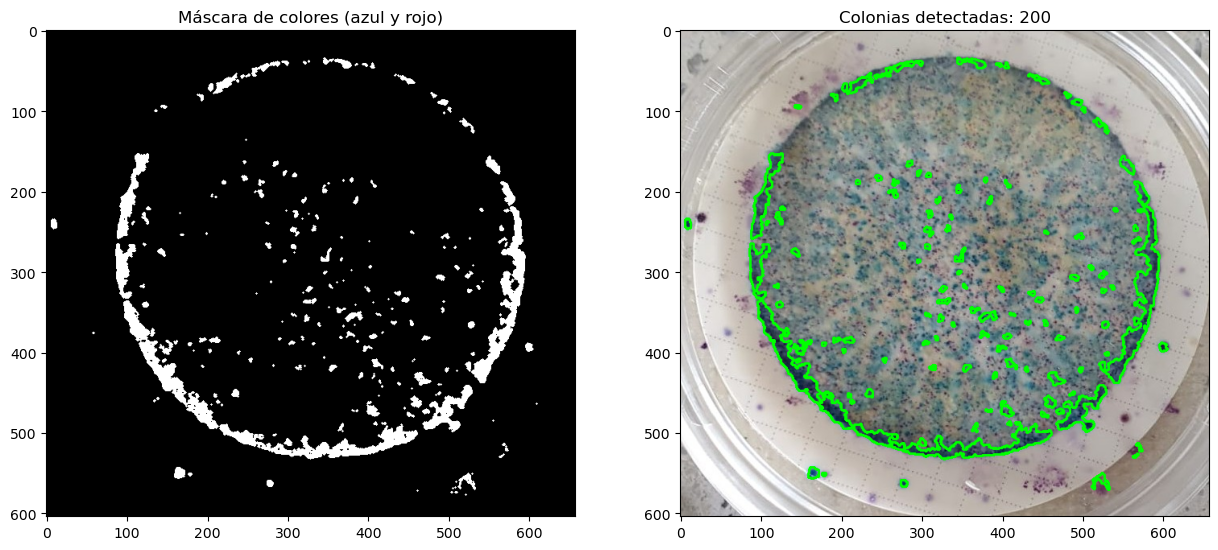

Total de colonias detectadas (UFC): 200


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = "prueba.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir a espacio de color HSV para facilitar la segmentación por color
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir rangos de color para azul y rojo
blue_lower = np.array([100, 50, 50])
blue_upper = np.array([140, 255, 255])
red_lower1 = np.array([0, 50, 50])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 50, 50])
red_upper2 = np.array([180, 255, 255])

# Crear máscaras para azul y rojo
mask_blue = cv2.inRange(hsv, blue_lower, blue_upper)
mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
mask_red = cv2.add(mask_red1, mask_red2)

# Combinar máscaras
mask = cv2.add(mask_blue, mask_red)

# Realizar operaciones morfológicas para limpiar ruido
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
clean_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Encontrar contornos de las regiones detectadas
contours, _ = cv2.findContours(clean_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en la imagen original
output_image = image_rgb.copy()
for contour in contours:
    # Filtrar áreas pequeñas para evitar ruido
    if cv2.contourArea(contour) > 10:  # Ajusta este valor según sea necesario
        cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

# Mostrar resultados
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.title("Máscara de colores (azul y rojo)")
plt.imshow(clean_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.title(f"Colonias detectadas: {len(contours)}")
plt.imshow(output_image)
plt.show()

print(f"Total de colonias detectadas (UFC): {len(contours)}")


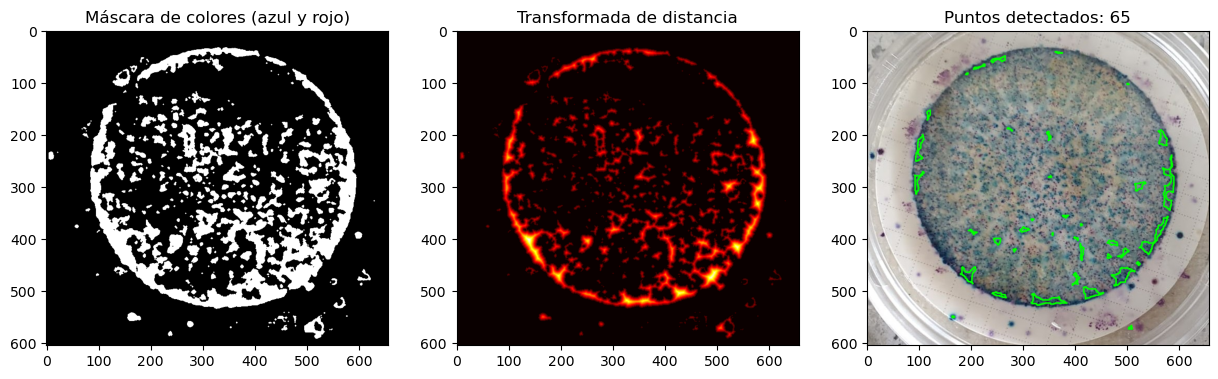

Total de puntos detectados (UFC): 65


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
image_path = "prueba.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convertir la imagen a espacio HSV para facilitar la segmentación
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir rangos de color más amplios para azul y rojo (para captar variaciones de iluminación)
blue_lower = np.array([90, 30, 30])
blue_upper = np.array([140, 255, 255])
red_lower1 = np.array([0, 30, 30])
red_upper1 = np.array([10, 255, 255])
red_lower2 = np.array([170, 30, 30])
red_upper2 = np.array([180, 255, 255])

# Crear máscaras para azul y rojo
mask_blue = cv2.inRange(hsv, blue_lower, blue_upper)
mask_red1 = cv2.inRange(hsv, red_lower1, red_upper1)
mask_red2 = cv2.inRange(hsv, red_lower2, red_upper2)
mask_red = cv2.add(mask_red1, mask_red2)

# Combinar máscaras
mask = cv2.add(mask_blue, mask_red)

# Aplicar operaciones morfológicas para eliminar ruido
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
clean_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Refinar la segmentación con la transformada de distancia para separar puntos apilados
dist_transform = cv2.distanceTransform(clean_mask, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.4 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Encontrar contornos de los puntos detectados
contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar contornos en la imagen original
output_image = image_rgb.copy()
for contour in contours:
    # Filtrar por tamaño de área para evitar falsos positivos
    if 5 < cv2.contourArea(contour) < 1000:  # Ajusta los valores según el tamaño de las colonias
        cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

# Mostrar resultados
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title("Máscara de colores (azul y rojo)")
plt.imshow(clean_mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.title("Transformada de distancia")
plt.imshow(dist_transform, cmap="hot")
plt.subplot(1, 3, 3)
plt.title(f"Puntos detectados: {len(contours)}")
plt.imshow(output_image)
plt.show()

print(f"Total de puntos detectados (UFC): {len(contours)}")


In [ ]:
import cv2
import numpy as np

# Cargar la imagen de la placa de Petri
img = cv2.imread('prueba.jpg')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización para separar las colonias del fondo
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Eliminar ruido con un filtro de apertura
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Encontrar los contornos de las colonias
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Contar el número de contornos
num_colonies = len(contours)

print("Número de colonias:", num_colonies)

# Mostrar la imagen con los contornos (opcional)
cv2.drawContours(img, contours, -1, (0,255,0), 3)
cv2.imshow('Imagen con contornos', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Número de colonias: 83


In [ ]:
import cv2
import numpy as np

# Cargar la imagen
img = cv2.imread('prueba.jpg')

# Convertir a HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir rangos de color para azul y rojo (ajusta estos valores según tu imagen)
lower_blue = np.array([100,50,50])
upper_blue = np.array([130,255,255])
lower_red = np.array([160,100,100])
upper_red = np.array([179,255,255])

# Crear máscaras para azul y rojo
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
mask_red = cv2.inRange(hsv, lower_red, upper_red)

# Aplicar operaciones morfológicas para mejorar los contornos
kernel = np.ones((3,3),np.uint8)
mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

# Encontrar contornos
contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Contar colonias y clasificar por color
num_blue = 0
num_red = 0
for cnt in contours_blue:
    x,y,w,h = cv2.boundingRect(cnt)
    # Calcular el color promedio dentro del contorno
    mean_color = cv2.mean(img[y:y+h, x:x+w])[0:3]
    # Clasificar como azul si el componente azul es mayor que un umbral
    if mean_color[0] > 100:
        num_blue += 1
        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

for cnt in contours_red:
    x,y,w,h = cv2.boundingRect(cnt)
    # Calcular el color promedio dentro del contorno
    mean_color = cv2.mean(img[y:y+h, x:x+w])[0:3]
    # Clasificar como rojo si el componente rojo es mayor que un umbral
    if mean_color[2] > 100:
        num_red += 1
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 2)

print("Número de colonias azules:", num_blue)
print("Número de colonias rojas:", num_red)

cv2.imshow('Resultado', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Número de colonias azules: 129
Número de colonias rojas: 0


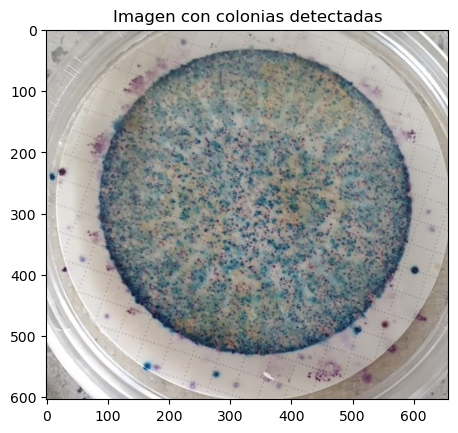

Número de colonias azules: 106
Número de colonias rojas: 29


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias azules y rojas.
    """

    # Convertir a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de color (ajustar según tus imágenes)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_red = np.array([160, 100, 100])
    upper_red = np.array([179, 255, 255])

    # Crear máscaras
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Aplicar operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Aplicar Watershed para segmentación
    dist_transform = cv2.distanceTransform(mask_blue, cv2.DIST_L2, 5)

    # Normalizar la imagen de distancia
    dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)

    # Convertir la imagen normalizada a uint8
    dist_transform = np.uint8(dist_transform)

    # Aplicar connectedComponents a la imagen normalizada
    ret, markers = cv2.connectedComponents(dist_transform)

    # Aplicar Watershed
    markers = cv2.watershed(imagen, markers)

    # Extraer características de textura usando mahotas
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    glcm = mahotas.features.texture.haralick(gray)  # Extrae las características de Haralick
    contrast = glcm[:, 0]  # Obtener el contraste
    homogeneity = glcm[:, 1]  # Obtener la homogeneidad

    # Visualización
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen con colonias detectadas')
    plt.show()

    # Contar colonias y mostrar resultados
    # En este ejemplo, se cuenta el número de componentes segmentados en la imagen
    num_colonias_azules = np.sum(markers == 1)  # Contar componentes azules
    num_colonias_rojas = np.sum(markers == 2)   # Contar componentes rojos

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba.jpg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar las colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules:", num_colonias_azules)
    print("Número de colonias rojas:", num_colonias_rojas)


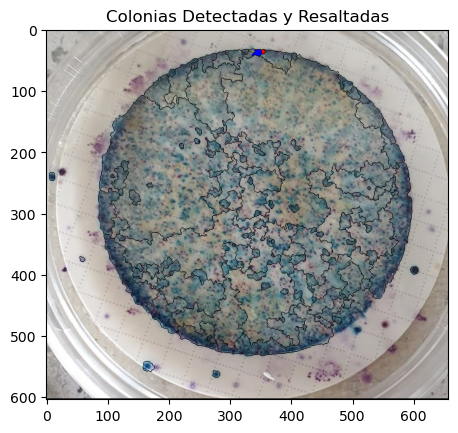

Número de colonias azules: 106
Número de colonias rojas: 29


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias azules y rojas.
    """

    # Convertir a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de color (ajustar según tus imágenes)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_red = np.array([160, 100, 100])
    upper_red = np.array([179, 255, 255])

    # Crear máscaras
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Aplicar operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Aplicar Watershed para segmentación
    dist_transform = cv2.distanceTransform(mask_blue, cv2.DIST_L2, 5)

    # Normalizar la imagen de distancia
    dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)

    # Convertir la imagen normalizada a uint8
    dist_transform = np.uint8(dist_transform)

    # Aplicar connectedComponents a la imagen normalizada
    ret, markers = cv2.connectedComponents(dist_transform)

    # Aplicar Watershed
    markers = cv2.watershed(imagen, markers)

    # Resaltar las colonias detectadas
    imagen_resaltada = imagen.copy()

    # Definir colores para las colonias detectadas
    imagen_resaltada[markers == -1] = [0, 0, 0]  # Poner negro en los bordes
    imagen_resaltada[markers == 1] = [255, 0, 0]  # Resaltar colonias azules con rojo
    imagen_resaltada[markers == 2] = [0, 0, 255]  # Resaltar colonias rojas con azul

    # Extraer características de textura usando mahotas
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    glcm = mahotas.features.texture.haralick(gray)  # Extrae las características de Haralick
    contrast = glcm[:, 0]  # Obtener el contraste
    homogeneity = glcm[:, 1]  # Obtener la homogeneidad

    # Visualizar la imagen con las colonias resaltadas
    plt.imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))
    plt.title('Colonias Detectadas y Resaltadas')
    plt.show()

    # Contar colonias y mostrar resultados
    num_colonias_azules = np.sum(markers == 1)  # Contar componentes azules
    num_colonias_rojas = np.sum(markers == 2)   # Contar componentes rojos

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba.jpg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar las colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules:", num_colonias_azules)
    print("Número de colonias rojas:", num_colonias_rojas)


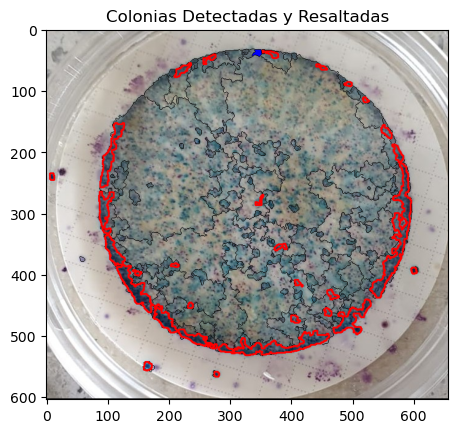

Número de colonias azules: 156
Número de colonias rojas: 0


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen, incluyendo las colonias pequeñas dentro de las zonas detectadas.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias azules y rojas.
    """

    # Convertir a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de color (ajustar según tus imágenes)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_red = np.array([160, 100, 100])
    upper_red = np.array([179, 255, 255])

    # Crear máscaras
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Aplicar operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Aplicar Watershed para segmentación
    dist_transform = cv2.distanceTransform(mask_blue, cv2.DIST_L2, 5)

    # Normalizar la imagen de distancia
    dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)

    # Convertir la imagen normalizada a uint8
    dist_transform = np.uint8(dist_transform)

    # Aplicar connectedComponents a la imagen normalizada
    ret, markers = cv2.connectedComponents(dist_transform)

    # Aplicar Watershed
    markers = cv2.watershed(imagen, markers)

    # Resaltar las colonias detectadas
    imagen_resaltada = imagen.copy()

    # Definir colores para las colonias detectadas
    imagen_resaltada[markers == -1] = [0, 0, 0]  # Poner negro en los bordes
    imagen_resaltada[markers == 1] = [255, 0, 0]  # Resaltar colonias azules con rojo
    imagen_resaltada[markers == 2] = [0, 0, 255]  # Resaltar colonias rojas con azul

    # Detectar las colonias pequeñas dentro de las zonas ya detectadas
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar y resaltar las colonias pequeñas
    for contour in contours_blue:
        if cv2.contourArea(contour) > 50:  # Filtrar por área mínima
            cv2.drawContours(imagen_resaltada, [contour], -1, (0, 0, 255), 2)  # Azul con rojo
    for contour in contours_red:
        if cv2.contourArea(contour) > 50:  # Filtrar por área mínima
            cv2.drawContours(imagen_resaltada, [contour], -1, (255, 0, 0), 2)  # Rojo con azul

    # Extraer características de textura usando mahotas
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    glcm = mahotas.features.texture.haralick(gray)  # Extrae las características de Haralick
    contrast = glcm[:, 0]  # Obtener el contraste
    homogeneity = glcm[:, 1]  # Obtener la homogeneidad

    # Visualizar la imagen con las colonias resaltadas
    plt.imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))
    plt.title('Colonias Detectadas y Resaltadas')
    plt.show()

    # Contar colonias y mostrar resultados
    num_colonias_azules = len(contours_blue)  # Contar las colonias azules detectadas
    num_colonias_rojas = len(contours_red)   # Contar las colonias rojas detectadas

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba.jpg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar las colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules:", num_colonias_azules)
    print("Número de colonias rojas:", num_colonias_rojas)


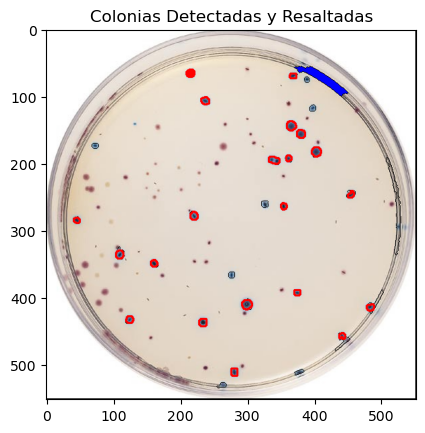

Número de colonias azules: 30
Número de colonias rojas: 6


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen, incluyendo las colonias pequeñas dentro de las zonas detectadas.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias azules y rojas.
    """

    # Convertir a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de color (ajustar según tus imágenes)
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])
    lower_red = np.array([160, 100, 100])
    upper_red = np.array([179, 255, 255])

    # Crear máscaras
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Aplicar operaciones morfológicas
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Aplicar Watershed para segmentación
    dist_transform = cv2.distanceTransform(mask_blue, cv2.DIST_L2, 5)

    # Normalizar la imagen de distancia
    dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX)

    # Convertir la imagen normalizada a uint8
    dist_transform = np.uint8(dist_transform)

    # Aplicar connectedComponents a la imagen normalizada
    ret, markers = cv2.connectedComponents(dist_transform)

    # Aplicar Watershed
    markers = cv2.watershed(imagen, markers)

    # Resaltar las colonias detectadas
    imagen_resaltada = imagen.copy()

    # Definir colores para las colonias detectadas
    imagen_resaltada[markers == -1] = [0, 0, 0]  # Poner negro en los bordes
    imagen_resaltada[markers == 1] = [255, 0, 0]  # Resaltar colonias azules con rojo
    imagen_resaltada[markers == 2] = [0, 0, 255]  # Resaltar colonias rojas con azul

    # Detectar las colonias pequeñas dentro de las zonas ya detectadas
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar y resaltar las colonias pequeñas
    for contour in contours_blue:
        if cv2.contourArea(contour) > 50:  # Filtrar por área mínima
            cv2.drawContours(imagen_resaltada, [contour], -1, (0, 0, 255), 2)  # Azul con rojo
    for contour in contours_red:
        if cv2.contourArea(contour) > 50:  # Filtrar por área mínima
            cv2.drawContours(imagen_resaltada, [contour], -1, (255, 0, 0), 2)  # Rojo con azul

    # Extraer características de textura usando mahotas
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    glcm = mahotas.features.texture.haralick(gray)  # Extrae las características de Haralick
    contrast = glcm[:, 0]  # Obtener el contraste
    homogeneity = glcm[:, 1]  # Obtener la homogeneidad

    # Visualizar la imagen con las colonias resaltadas
    plt.imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))
    plt.title('Colonias Detectadas y Resaltadas')
    plt.show()

    # Contar colonias y mostrar resultados
    num_colonias_azules = len(contours_blue)  # Contar las colonias azules detectadas
    num_colonias_rojas = len(contours_red)   # Contar las colonias rojas detectadas

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba_2.jpg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar las colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules:", num_colonias_azules)
    print("Número de colonias rojas:", num_colonias_rojas)

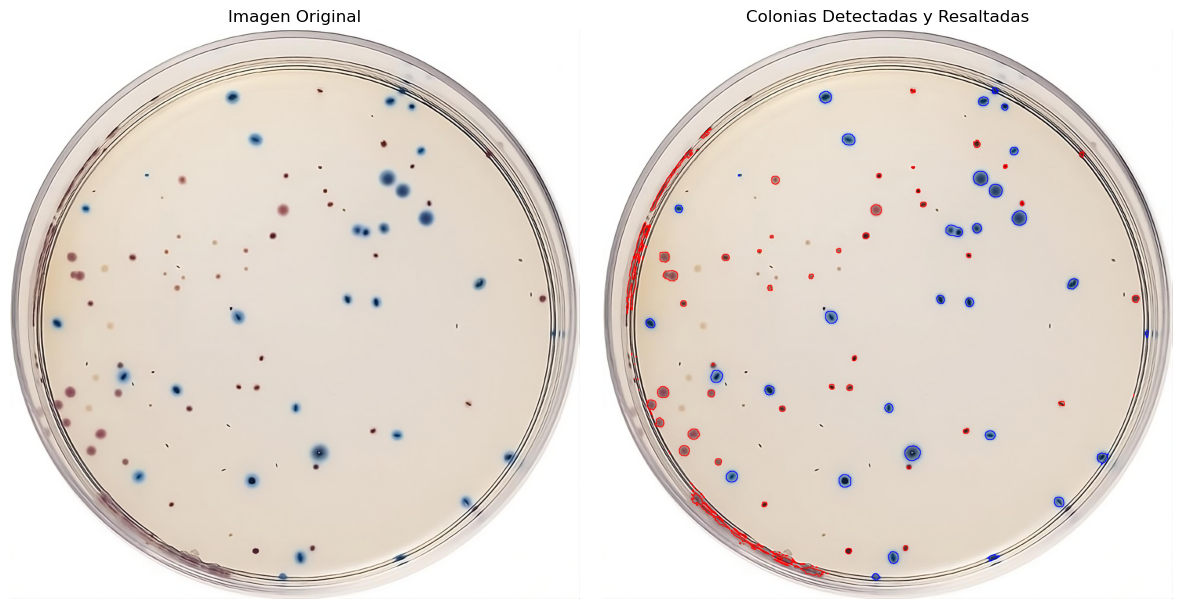

Número de colonias azules (y similares): 31
Número de colonias rojas (y similares): 111


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen, incluyendo variantes de azul y rojo.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias de colores similares a azul y rojo.
    """
    # Convertir a espacio de color HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de colores ampliados
    # Variantes de azul: celeste, azul marino, cian
    lower_blue1 = np.array([90, 50, 50])    # Celeste y cian
    upper_blue1 = np.array([100, 255, 255])
    lower_blue2 = np.array([101, 50, 50])  # Azul clásico
    upper_blue2 = np.array([130, 255, 255])
    lower_blue3 = np.array([131, 50, 50])  # Azul marino
    upper_blue3 = np.array([140, 255, 255])

    # Variantes de rojo: rosado, magenta, vinotinto
    lower_red1 = np.array([0, 50, 50])     # Rojo bajo
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 50, 50])   # Rojo alto
    upper_red2 = np.array([179, 255, 255])
    lower_pink = np.array([140, 50, 50])   # Magenta y fucsia
    upper_pink = np.array([159, 255, 255])

    # Crear máscaras para colores similares
    mask_blue1 = cv2.inRange(hsv, lower_blue1, upper_blue1)
    mask_blue2 = cv2.inRange(hsv, lower_blue2, upper_blue2)
    mask_blue3 = cv2.inRange(hsv, lower_blue3, upper_blue3)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_pink = cv2.inRange(hsv, lower_pink, upper_pink)

    # Combinar máscaras de colores similares
    mask_blue = cv2.add(mask_blue1, cv2.add(mask_blue2, mask_blue3))
    mask_red = cv2.add(mask_red1, cv2.add(mask_red2, mask_pink))

    # Operaciones morfológicas para limpiar ruido
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Detectar contornos
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear copia de la imagen para resaltar los resultados
    imagen_resaltada = imagen.copy()

    # Resaltar colonias detectadas (área mínima reducida)
    for contour in contours_blue:
        if cv2.contourArea(contour) > 0.0001:  # Filtrar colonias pequeñas
            cv2.drawContours(imagen_resaltada, [contour], -1, (255, 0, 0), 2)  # Azul

    for contour in contours_red:
        if cv2.contourArea(contour) > 0.0001:  # Filtrar colonias pequeñas
            cv2.drawContours(imagen_resaltada, [contour], -1, (0, 0, 255), 2)  # Rojo

    # Características de textura con mahotas
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    glcm = mahotas.features.texture.haralick(gray)
    contrast = glcm[:, 0]
    homogeneity = glcm[:, 1]

    # Mostrar la imagen original y la procesada lado a lado
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))
    plt.title('Colonias Detectadas y Resaltadas')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Contar colonias detectadas
    num_colonias_azules = len([c for c in contours_blue if cv2.contourArea(c) > 0.0001])
    num_colonias_rojas = len([c for c in contours_red if cv2.contourArea(c) > 0.0001])

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba_2_1.jpeg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules (y similares):", num_colonias_azules)
    print("Número de colonias rojas (y similares):", num_colonias_rojas)



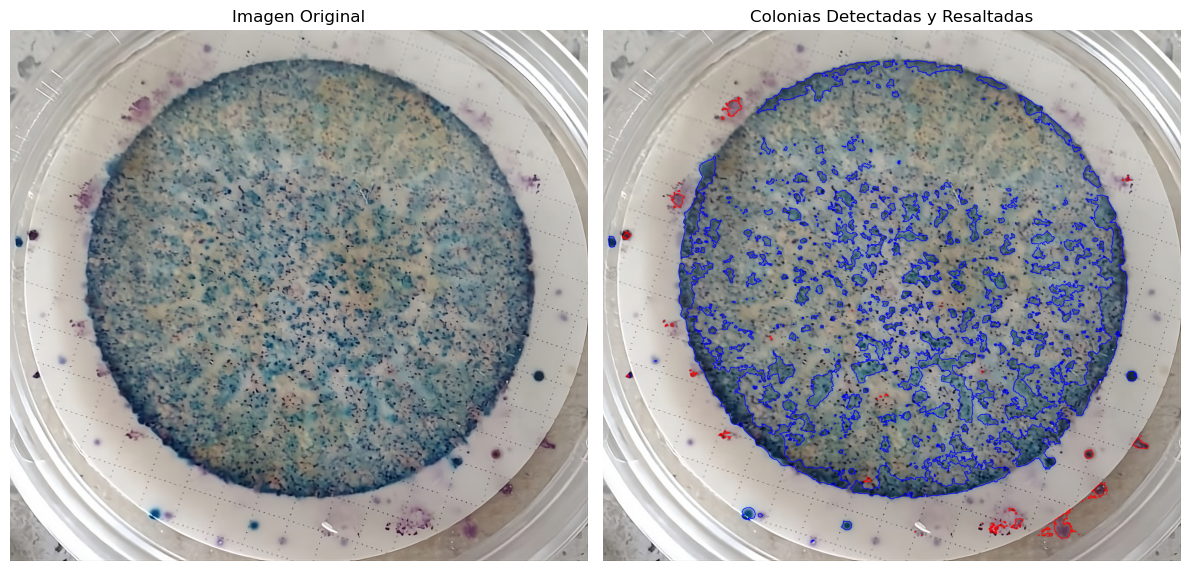

Número de colonias azules (y similares): 650
Número de colonias rojas (y similares): 105


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen, incluyendo variantes de azul y rojo.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias de colores similares a azul y rojo.
    """
    # Convertir a espacio de color HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de colores ampliados
    # Variantes de azul: celeste, azul marino, cian
    lower_blue1 = np.array([90, 50, 50])    # Celeste y cian
    upper_blue1 = np.array([100, 255, 255])
    lower_blue2 = np.array([101, 50, 50])  # Azul clásico
    upper_blue2 = np.array([130, 255, 255])
    lower_blue3 = np.array([131, 50, 50])  # Azul marino
    upper_blue3 = np.array([140, 255, 255])

    # Variantes de rojo: rosado, magenta, vinotinto
    lower_red1 = np.array([0, 50, 50])     # Rojo bajo
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 50, 50])   # Rojo alto
    upper_red2 = np.array([179, 255, 255])
    lower_pink = np.array([140, 50, 50])   # Magenta y fucsia
    upper_pink = np.array([159, 255, 255])

    # Crear máscaras para colores similares
    mask_blue1 = cv2.inRange(hsv, lower_blue1, upper_blue1)
    mask_blue2 = cv2.inRange(hsv, lower_blue2, upper_blue2)
    mask_blue3 = cv2.inRange(hsv, lower_blue3, upper_blue3)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_pink = cv2.inRange(hsv, lower_pink, upper_pink)

    # Combinar máscaras de colores similares
    mask_blue = cv2.add(mask_blue1, cv2.add(mask_blue2, mask_blue3))
    mask_red = cv2.add(mask_red1, cv2.add(mask_red2, mask_pink))

    # Operaciones morfológicas para limpiar ruido
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Detectar contornos
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear copia de la imagen para resaltar los resultados
    imagen_resaltada = imagen.copy()

    # Resaltar colonias detectadas (área mínima reducida)
    for contour in contours_blue:
        if cv2.contourArea(contour) > 0.01:  # Filtrar colonias pequeñas
            cv2.drawContours(imagen_resaltada, [contour], -1, (255, 0, 0), 2)  # Azul

    for contour in contours_red:
        if cv2.contourArea(contour) > 0.01:  # Filtrar colonias pequeñas
            cv2.drawContours(imagen_resaltada, [contour], -1, (0, 0, 255), 2)  # Rojo

    # Características de textura con mahotas
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    glcm = mahotas.features.texture.haralick(gray)
    contrast = glcm[:, 0]
    homogeneity = glcm[:, 1]

    # Mostrar la imagen original y la procesada lado a lado
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))
    plt.title('Colonias Detectadas y Resaltadas')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Contar colonias detectadas
    num_colonias_azules = len([c for c in contours_blue if cv2.contourArea(c) > 0.01])
    num_colonias_rojas = len([c for c in contours_red if cv2.contourArea(c) > 0.01])

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba_esca.jpeg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules (y similares):", num_colonias_azules)
    print("Número de colonias rojas (y similares):", num_colonias_rojas)


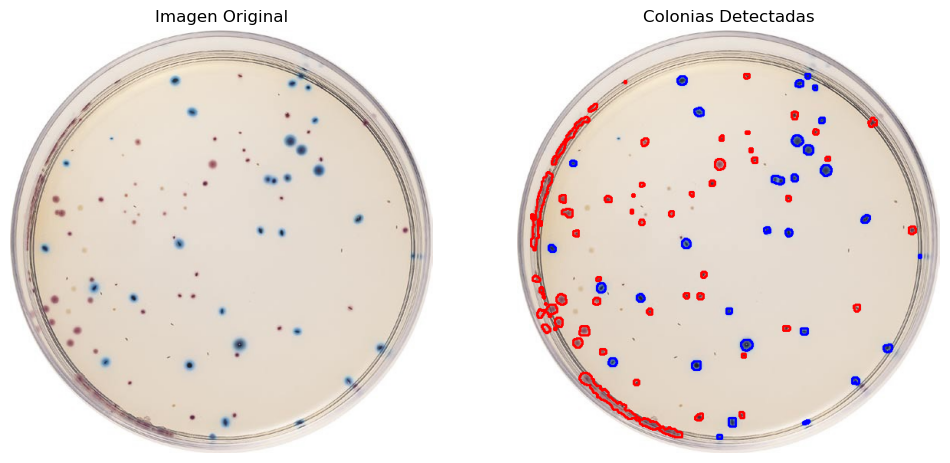

Número de colonias azules: 30
Número de colonias rojas: 53


In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar_colonias(imagen):
    """
    Cuenta y clasifica colonias bacterianas en una imagen, incluyendo variantes de rojo, azul y sus derivados.

    Args:
        imagen: La imagen a procesar.

    Returns:
        Una tupla con el número de colonias azules y rojas (incluyendo variantes).
    """

    # Convertir a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de colores ampliados para detectar variantes
    lower_blue = np.array([90, 50, 50])  # Incluye azul claro y cian
    upper_blue = np.array([140, 255, 255])
    
    # Rango ampliado para rojo y derivados (incluyendo beige y rosado)
    lower_red1 = np.array([0, 30, 50])   # Rango bajo ampliado para incluir beige
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 30, 50]) # Rango alto ampliado
    upper_red2 = np.array([179, 255, 255])

    # Crear máscaras
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
    mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask_red = cv2.add(mask_red1, mask_red2)  # Combinar ambos rangos de rojo

    # Aplicar operaciones morfológicas para limpiar el ruido
    kernel = np.ones((3, 3), np.uint8)
    mask_blue = cv2.morphologyEx(mask_blue, cv2.MORPH_OPEN, kernel)
    mask_red = cv2.morphologyEx(mask_red, cv2.MORPH_OPEN, kernel)

    # Detectar contornos de colonias
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Crear copia de la imagen para resaltar resultados
    imagen_resaltada = imagen.copy()

    # Filtrar y resaltar las colonias pequeñas (área mínima reducida a 10 píxeles)
    for contour in contours_blue:
        if cv2.contourArea(contour) > 0.0001:  # Umbral reducido para incluir puntos pequeños
            cv2.drawContours(imagen_resaltada, [contour], -1, (255, 0, 0), 2)  # Resaltar en azul
    for contour in contours_red:
        if cv2.contourArea(contour) > 0.0001:  # Umbral reducido para incluir puntos pequeños
            cv2.drawContours(imagen_resaltada, [contour], -1, (0, 0, 255), 2)  # Resaltar en rojo

    # Mostrar imagen original y resaltada lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    axs[0].set_title("Imagen Original")
    axs[0].axis('off')
    axs[1].imshow(cv2.cvtColor(imagen_resaltada, cv2.COLOR_BGR2RGB))
    axs[1].set_title("Colonias Detectadas")
    axs[1].axis('off')
    plt.show()

    # Contar colonias detectadas
    num_colonias_azules = len([c for c in contours_blue if cv2.contourArea(c) > 0.0001])
    num_colonias_rojas = len([c for c in contours_red if cv2.contourArea(c) > 0.0001])

    return num_colonias_azules, num_colonias_rojas


# Cargar la imagen
imagen = cv2.imread('prueba_2.jpg')

# Verificar si la imagen se cargó correctamente
if imagen is None:
    print("Error: La imagen no se pudo cargar. Verifica la ruta del archivo.")
else:
    # Llamar a la función para contar las colonias
    num_colonias_azules, num_colonias_rojas = contar_colonias(imagen)

    print("Número de colonias azules:", num_colonias_azules)
    print("Número de colonias rojas:", num_colonias_rojas)


In [19]:
import cv2
print(cv2.__version__)

4.10.0
